In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_excel("Data_Train.xlsx")

In [3]:
df_train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df_train[df_train["Route"].isnull()]  

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
df_train = df_train.dropna()
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_train.duplicated().sum()

np.int64(220)

In [10]:
df_train[df_train.duplicated(keep = False)].sort_values(by = df_train.columns.tolist())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6321,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
572,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
8168,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
1495,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
...,...,...,...,...,...,...,...,...,...,...,...
2870,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
1535,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
3711,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
2634,Vistara,24/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,5403


In [11]:
df_train = df_train.drop_duplicates()

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [13]:
data = df_train.copy()

In [14]:
data[["Airline", "Date_of_Journey"]]

,Airline,Date_of_Journey
0,IndiGo,24/03/2019
1,Air India,1/05/2019
2,Jet Airways,9/06/2019
3,IndiGo,12/05/2019
4,IndiGo,01/03/2019
...,...,...
10678,Air Asia,9/04/2019
10679,Air India,27/04/2019
10680,Jet Airways,27/04/2019
10681,Vistara,01/03/2019


In [15]:
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y")

In [16]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [17]:
data["Journey_day"] = data["Date_of_Journey"].dt.day
data["Journey_month"] = data["Date_of_Journey"].dt.month    
data["Journey_year"] = data["Date_of_Journey"].dt.year
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [18]:
data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
data["Departure_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Departure_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data

C:\Users\spets\AppData\Local\Temp\ipykernel_23868\3098534102.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
C:\Users\spets\AppData\Local\Temp\ipykernel_23868\3098534102.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
C:\Users\spets\AppData\Local\Temp\ipykernel_23868\3098534102.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Departure_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
C:\Users\spets\AppData\Local\Temp\ipyk

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,22,25,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30


In [19]:
def flight_dep_time(x):
    if x in range(3, 7):
        return "Early_Morning"
    elif x in range(7, 12):
        return "Morning"
    elif x in range(12, 16):
        return "Afternoon"
    elif x in range(16, 20):
        return "Evening"
    else:
        return "Night"

In [20]:
data["Departure_Time_Category"] = data["Departure_hour"].apply(flight_dep_time)

In [21]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,Departure_Time_Category
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,Night
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,Early_Morning
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,Morning
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,Evening
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,22,25,19,55,Evening
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45,Night
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,11,20,8,20,Morning
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30,Morning


,Departure_Time_Category,count
0,Morning,3549
1,Evening,2135
2,Night,1915
3,Early_Morning,1450
4,Afternoon,1413


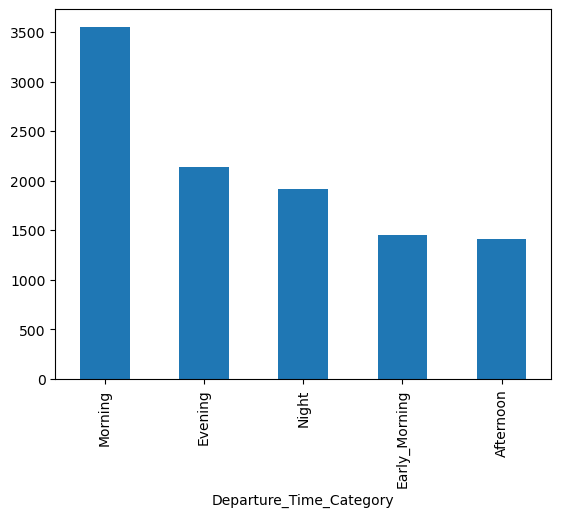

In [22]:
data["Departure_Time_Category"].value_counts().plot(kind = "bar")
import plotly.express as px
counts = data["Departure_Time_Category"].value_counts().reset_index()
counts

In [23]:
px.bar(data_frame=counts, x = "Departure_Time_Category", y = "count")

In [24]:
def preprocess_duration(x):
    if "h" not in x:
        x = "0h" + " " + x
    elif "m" not in x:
        x = x + " " + "0m"
    
    return x


In [25]:
data["Duration"] = data["Duration"].apply(preprocess_duration)
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours
data["Duration_minutes"] = pd.to_timedelta(data["Duration"]).dt.components.minutes
cols_to_drop = ["Dep_Time", "Arrival_Time", "Duration", "Date_of_Journey"]
data.drop(cols_to_drop, axis = 1, inplace = True)
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,Departure_Time_Category,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,1,10,22,20,Night,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,13,15,5,50,Early_Morning,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,4,25,9,25,Morning,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,23,30,18,5,Evening,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,21,35,16,50,Evening,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,22,25,19,55,Evening,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,23,20,20,45,Night,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,11,20,8,20,Morning,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,14,10,11,30,Morning,2,40


In [26]:
def convert_to_usd(x):
    return int(x * 0.0142)


In [27]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Arrival_hour', 'Arrival_min', 'Departure_hour',
       'Departure_min', 'Departure_Time_Category', 'Duration_hour',
       'Duration_minutes'],
      dtype='object')

<Axes: xlabel='Total_min', ylabel='Price_USD'>

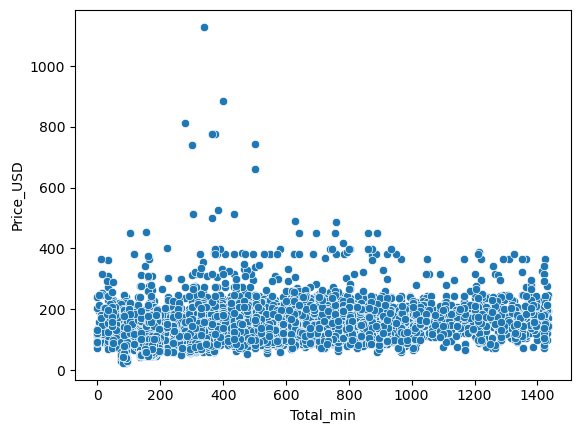

In [28]:
data["Total_min"] = data["Duration_hour"] * 60 + data["Duration_minutes"]
data["Price_USD"] = data["Price"].apply(convert_to_usd)
sns.scatterplot(data = data, x ="Total_min", y = "Price_USD" )

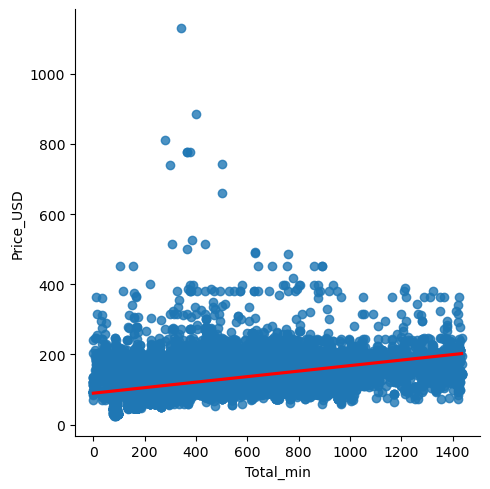

In [29]:
sns.lmplot(data = data, x ="Total_min", y = "Price_USD", line_kws = {"color": "red"} )

In [30]:
import re
def extract_stops(x):
    match = re.search(r'\d+', str(x))
    return int(match.group()) if match else 0


In [31]:
data["Total_Stops"] = data["Total_Stops"].apply(extract_stops)
data.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Total_Stops                 int64
Additional_Info            object
Price                       int64
Journey_day                 int32
Journey_month               int32
Journey_year                int32
Arrival_hour                int32
Arrival_min                 int32
Departure_hour              int32
Departure_min               int32
Departure_Time_Category    object
Duration_hour               int64
Duration_minutes            int64
Total_min                   int64
Price_USD                   int64
dtype: object

In [32]:
data.drop("Price", axis = 1, inplace = True)


In [33]:
cat_col = [col for col in data.columns if data[col].dtype == "object"]

In [34]:
num_col = [col for col in data.columns if data[col].dtype != "object"]

In [35]:
source_dummies = pd.get_dummies(data["Source"], prefix="Source").astype(int)

In [36]:
data = pd.concat([data, source_dummies] , axis = 1 )

In [37]:
airlines = data.groupby(["Airline"])["Price_USD"].mean().sort_values().index

In [38]:
numbers = range(len(airlines))

In [39]:
airlines_dict= dict(zip(airlines, numbers))

In [40]:
airlines_dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [41]:
data["Airline"] = data["Airline"].map(airlines_dict)

In [42]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [43]:
data["Destination"].replace("New Delhi", "Delhi", inplace = True)

C:\Users\spets\AppData\Local\Temp\ipykernel_23868\1263318055.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [44]:
data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [45]:
destinations = data.groupby(["Destination"])["Price_USD"].mean().sort_values().index

In [46]:
destinations

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [47]:
dict_dest = dict(zip(destinations, numbers))

In [48]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [49]:
data["Destination"] = data["Destination"].map(dict_dest)

In [50]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Arrival_hour,...,Departure_Time_Category,Duration_hour,Duration_minutes,Total_min,Price_USD,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,Banglore,2,BLR → DEL,0,No info,24,3,2019,1,...,Night,2,50,170,55,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,2,No info,1,5,2019,13,...,Early_Morning,7,25,445,108,0,0,0,1,0
2,10,Delhi,4,DEL → LKO → BOM → COK,2,No info,9,6,2019,4,...,Morning,19,0,1140,197,0,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,1,No info,12,5,2019,23,...,Evening,5,25,325,88,0,0,0,1,0
4,3,Banglore,2,BLR → NAG → DEL,1,No info,1,3,2019,21,...,Evening,4,45,285,188,1,0,0,0,0


In [51]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Journey_day', 'Journey_month', 'Journey_year',
       'Arrival_hour', 'Arrival_min', 'Departure_hour', 'Departure_min',
       'Departure_Time_Category', 'Duration_hour', 'Duration_minutes',
       'Total_min', 'Price_USD', 'Source_Banglore', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [52]:
columns = ["Additional_Info" , "Source", "Journey_year", "Route", "Duration_hour", "Duration_minutes", "Departure_Time_Category"]

In [53]:
data = data.drop(columns = columns, axis=1)

In [54]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Journey_day', 'Journey_month',
       'Arrival_hour', 'Arrival_min', 'Departure_hour', 'Departure_min',
       'Total_min', 'Price_USD', 'Source_Banglore', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [55]:

#outlier detection
def plot(df , col):
    fig , (ax1, ax2, ax3 ) = plt.subplots(3 , 1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(data = df, x = col, ax = ax2)
    sns.distplot(df[col], ax = ax3, kde=False)



C:\Users\spets\AppData\Local\Temp\ipykernel_23868\2700688873.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\spets\AppData\Local\Temp\ipykernel_23868\2700688873.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




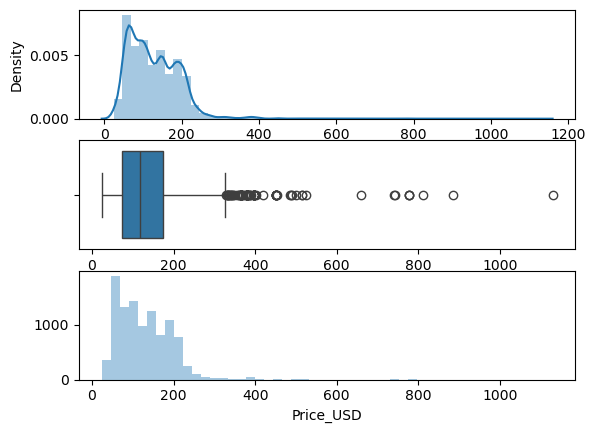

In [56]:
plot(data, "Price_USD")

In [57]:
q1 = data["Price_USD"].quantile(0.25)

q3 = data["Price_USD"].quantile(0.75)

iqr = q3 - q1


In [58]:
maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr

In [59]:
len([price for price in data["Price_USD"] if price>maximum or price < minimum])


94

In [60]:
# Filter out outliers using IQR bounds
data = data[(data["Price_USD"] >= minimum) & (data["Price_USD"] <= maximum)]
print(f"Data shape after removing outliers: {data.shape}")
data.head()

Data shape after removing outliers: (10368, 16)


,Airline,Destination,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Departure_hour,Departure_min,Total_min,Price_USD,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,0,24,3,1,10,22,20,170,55,1,0,0,0,0
1,7,3,2,1,5,13,15,5,50,445,108,0,0,0,1,0
2,10,4,2,9,6,4,25,9,25,1140,197,0,0,1,0,0
3,3,3,1,12,5,23,30,18,5,325,88,0,0,0,1,0
4,3,2,1,1,3,21,35,16,50,285,188,1,0,0,0,0


C:\Users\spets\AppData\Local\Temp\ipykernel_23868\2700688873.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\spets\AppData\Local\Temp\ipykernel_23868\2700688873.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




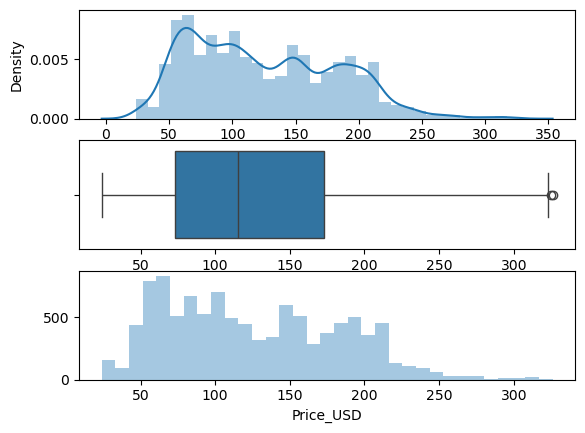

In [61]:
# Visualize data after removing outliers
plot(data, "Price_USD")

In [62]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Journey_day', 'Journey_month',
       'Arrival_hour', 'Arrival_min', 'Departure_hour', 'Departure_min',
       'Total_min', 'Price_USD', 'Source_Banglore', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [63]:
X = data.drop(["Price_USD"], axis = 1)

In [64]:
y = data["Price_USD"]

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [67]:
rf.fit(X, y)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
rf.feature_importances_

array([0.17572272, 0.00714174, 0.48026815, 0.08954505, 0.07807174,
       0.02825367, 0.02039746, 0.02753337, 0.02503799, 0.04830545,
       0.00243328, 0.00146216, 0.00335364, 0.00856344, 0.00391013])

In [69]:
X.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Journey_day', 'Journey_month',
       'Arrival_hour', 'Arrival_min', 'Departure_hour', 'Departure_min',
       'Total_min', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [70]:
pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
})

,Feature,Importance
0,Airline,0.175723
1,Destination,0.007142
2,Total_Stops,0.480268
3,Journey_day,0.089545
4,Journey_month,0.078072
5,Arrival_hour,0.028254
6,Arrival_min,0.020397
7,Departure_hour,0.027533
8,Departure_min,0.025038
9,Total_min,0.048305


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [73]:
from sklearn.ensemble import RandomForestRegressor


In [74]:
ml_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)


In [75]:
ml_model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
y_pred = ml_model.predict(X_test)

In [77]:
from sklearn import metrics

In [78]:
metrics.mean_absolute_error(y_test, y_pred)

15.496978379983476

In [79]:
metrics.mean_absolute_percentage_error(y_test, y_pred)

0.12481915973774393

In [80]:
metrics.r2_score(y_test, y_pred)

0.8303990476263818

In [81]:
import pickle 

In [82]:
with open("c:\\py\\Flight_price_prediction_ml_project\\rfr.pkl", "wb") as file:
    pickle.dump(ml_model, file)

In [83]:
model = open("c:\\py\\Flight_price_prediction_ml_project\\rfr.pkl", "rb")

In [84]:
rf_random = pickle.load(model)

In [85]:
y_pred2 = rf_random.predict(X_test)

In [86]:
metrics.r2_score(y_test, y_pred2)

0.8303990476263818

In [87]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(metrics.mean_absolute_percentage_error(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9516883067674876
predictions are : [144.53004762  55.51833333  74.45119048 ... 167.59583333  83.58
 101.09333333]


r2 score : 0.8113987146467703
MAE : 16.066699308172105
MSE : 627.3578994384811
RMSE : 25.047113594953036
MAPE : 0.12906421751483216


C:\Users\spets\AppData\Local\Temp\ipykernel_23868\1806927197.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




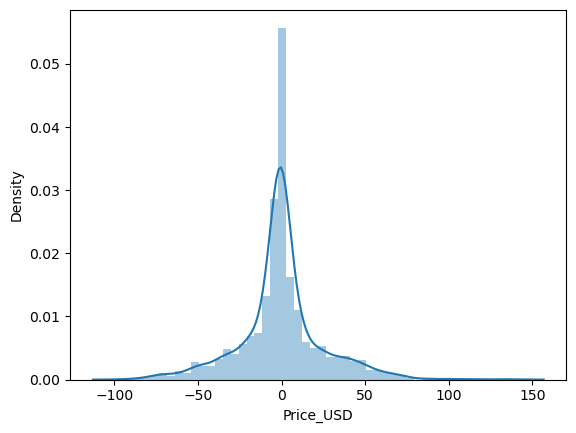

In [88]:
predict(RandomForestRegressor())

In [89]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9649413933158683
predictions are : [110.  54.  66. ... 158.  85.  99.]


r2 score : 0.705157740750175
MAE : 18.537885802469134
MSE : 980.7548240312072
RMSE : 31.317005349030538
MAPE : 0.14753774869334835


C:\Users\spets\AppData\Local\Temp\ipykernel_23868\1806927197.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




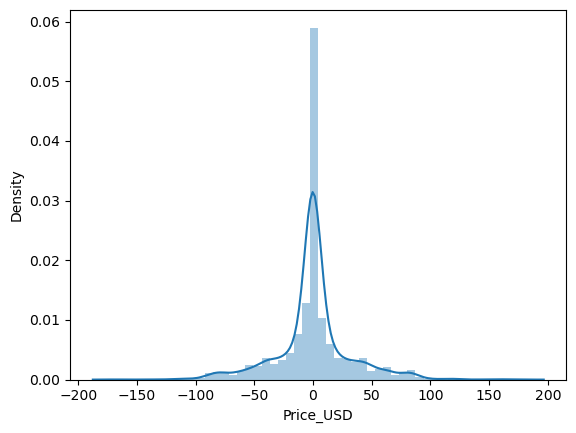

In [90]:
ml_model2 = DecisionTreeRegressor()
with open("c:\\py\\Flight_price_prediction_ml_project\\dtr.pkl", "wb") as file:
    pickle.dump(ml_model2, file)

predict(DecisionTreeRegressor())

In [91]:

print("Required features:")
print(X.columns.tolist())
print(f"Total: {len(X.columns)}")


single_input = pd.DataFrame({
    'Airline': [3],
    'Destination': [2],
    'Total_Stops': [1],
    'Journey_day': [15],
    'Journey_month': [6],
    'Arrival_hour': [14],
    'Arrival_min': [30],
    'Departure_hour': [10],
    'Departure_min': [15],
    'Total_min': [255],
    'Source_Banglore': [1],
    'Source_Chennai': [0],
    'Source_Delhi': [0],
    'Source_Kolkata': [0],
    'Source_Mumbai': [0]
}, columns=X.columns)  

prediction = ml_model.predict(single_input)[0]
print(f"\nPredicted price: ${prediction:.2f}")

Required features:
['Airline', 'Destination', 'Total_Stops', 'Journey_day', 'Journey_month', 'Arrival_hour', 'Arrival_min', 'Departure_hour', 'Departure_min', 'Total_min', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai']
Total: 15

Predicted price: $65.80


In [92]:
train_score = ml_model.score(X_train, y_train)
test_score = ml_model.score(X_test, y_test)

gap = train_score - test_score

print("Overfitting gap for random forest:", gap)

Overfitting gap for random forest: 0.10043670013817463


In [93]:
ml_model2.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [94]:
train_score = ml_model2.score(X_train, y_train)
test_score = ml_model2.score(X_test, y_test)

gap = train_score - test_score

print("Overfitting gap decision tree:", gap)

Overfitting gap decision tree: 0.2643264161139026


In [ ]:
from sklearn.model_selection import RandomizedSearchCVSearchCV

In [101]:
rfr = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [98]:
from sklearn.model_selection import RandomizedSearchCV


rfrtuning = RandomizedSearchCV(rfr, param_distributions=param_dist , n_iter = 50 , cv=5,
                                       verbose = 2, n_jobs = -1 ,scoring = "r2")

In [99]:
rfrtuning.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\spets\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\spets\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\spets\anaconda3\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\spets\anaconda3\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
  

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 15, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,50
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [100]:
rfrtuning.best_estimator_

,n_estimators,200
,criterion,'squared_error'
,max_depth,15
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [102]:
best_rf = rfrtuning.best_estimator_

In [103]:
rfrtuning.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 15,
 'bootstrap': False}

In [104]:
def predict_trained(model):
    y_prediction = model.predict(X_test)
    print('R2 score :', metrics.r2_score(y_test, y_prediction))
    print('MAE :', metrics.mean_absolute_error(y_test, y_prediction))
    print('MSE :', metrics.mean_squared_error(y_test, y_prediction))
    print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    print('MAPE :', metrics.mean_absolute_percentage_error(y_test, y_prediction))
    sns.histplot(y_test - y_prediction, kde=True)

R2 score : 0.8276264670214659
MAE : 17.03247385696653
MSE : 573.3783699600382
RMSE : 23.945320418821673
MAPE : 0.1407991740993157


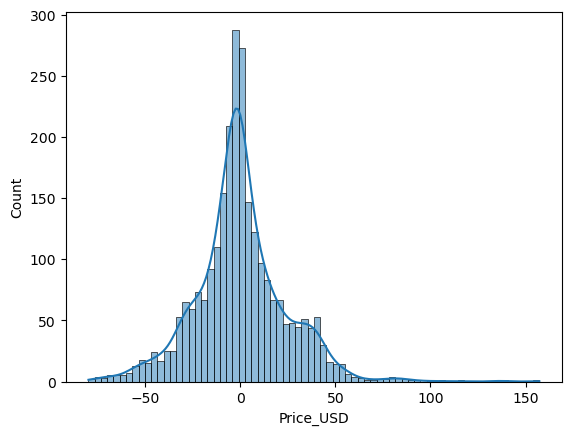

In [105]:
predict_trained(best_rf)

In [106]:
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)

gap = train_score - test_score

print("Overfitting gap random forest:", gap)

Overfitting gap random forest: 0.07602129561267146


In [107]:
with open("c:\\py\\Flight_price_prediction_ml_project\\tuned_rfr.pkl", "wb") as file:
    pickle.dump(best_rf, file)

In [108]:
dtr = DecisionTreeRegressor(random_state=42)

In [109]:
param_distribution2 = {
    "max_depth": [None, 3, 5, 7, 10, 15],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"],
    "criterion": ["squared_error", "friedman_mse", "poisson"]
}

In [ ]:
dtr_tuning = RandomizedSearchCV(dtr, param_distributions=param_distribution2, n_iter=50, cv=5,
                                verbose=2, n_jobs=-1, scoring="r2")

In [112]:
dtr_tuning.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,DecisionTreeR...ndom_state=42)
,param_distributions,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [None, 3, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,50
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [114]:
dtr_best = dtr_tuning.best_estimator_

R2 score : 0.8072437550720666
MAE : 16.508403936684232
MSE : 641.1788376476557
RMSE : 25.321509387231554
MAPE : 0.13253527609995083


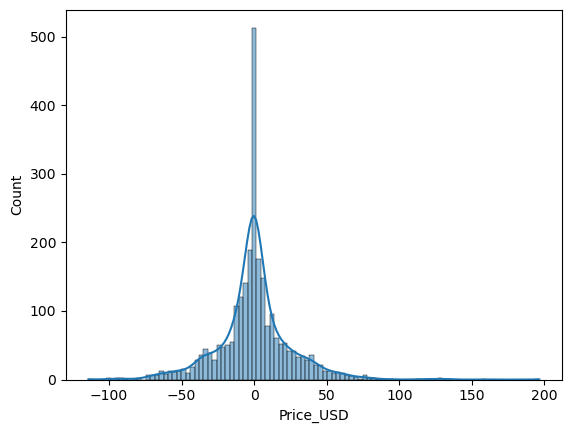

In [115]:
predict_trained(dtr_best)

In [116]:
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)

gap = train_score - test_score

print("Overfitting gap random forest:", gap)

Overfitting gap random forest: 0.07602129561267146


In [117]:
with open("c:\\py\\Flight_price_prediction_ml_project\\tuned_dtr.pkl", "wb") as file:
    pickle.dump(dtr_best, file)